# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [16]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    #f"{url}q={city}&appid={weather_api_key}&units=metric"
    #city_url = url + "&q=" + city + "&appid=" + weather_api_key


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | chernyshevskiy
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | weno
Processing Record 6 of Set 1 | vorgashor
Processing Record 7 of Set 1 | niafunke
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | bodo
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | alipur
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | gizo
Processing Record 18 of Set 1 | valle del guamuez
Processing Record 19 of Set 1 | coahuayana de hidalgo
Processing Record 20 of Set 1 | vilyuchinsk
Processing Record 21 of Set 1 | greymouth
Processin

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,24.92,92,100,14.03,PN,1707456655
1,chernyshevskiy,63.0128,112.4714,-27.53,96,99,0.79,RU,1707456655
2,port-aux-francais,-49.3500,70.2167,5.80,81,99,12.14,TF,1707456655
3,ilulissat,69.2167,-51.1000,-17.99,65,73,10.80,GL,1707456655
4,weno,7.4515,151.8468,28.97,74,100,3.60,FM,1707456655


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv('C:/Users/miame/OneDrive/Documents/bootcamp/MODULE 6 challenge/python-api-challenge/Starter_Code/output_data/cities.csv', index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/miame/OneDrive/Documents/bootcamp/MODULE 6 challenge/python-api-challenge/Starter_Code/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,24.92,92,100,14.03,PN,1707456655
1,chernyshevskiy,63.0128,112.4714,-27.53,96,99,0.79,RU,1707456655
2,port-aux-francais,-49.3500,70.2167,5.80,81,99,12.14,TF,1707456655
3,ilulissat,69.2167,-51.1000,-17.99,65,73,10.80,GL,1707456655
4,weno,7.4515,151.8468,28.97,74,100,3.60,FM,1707456655


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

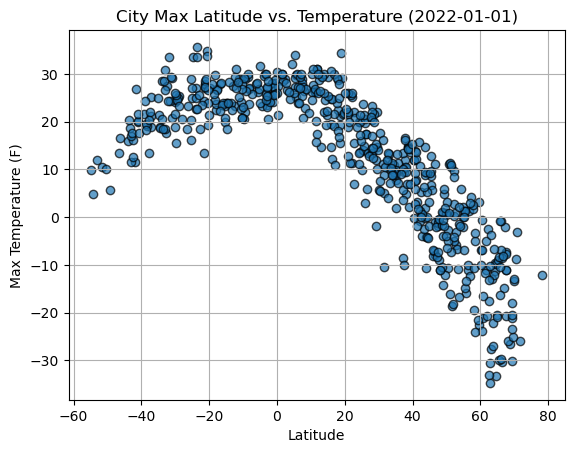

In [25]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-01-01)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
# Save the figure
plt.savefig("C:/Users/miame/OneDrive/Documents/bootcamp/MODULE 6 challenge/python-api-challenge/Starter_Code/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

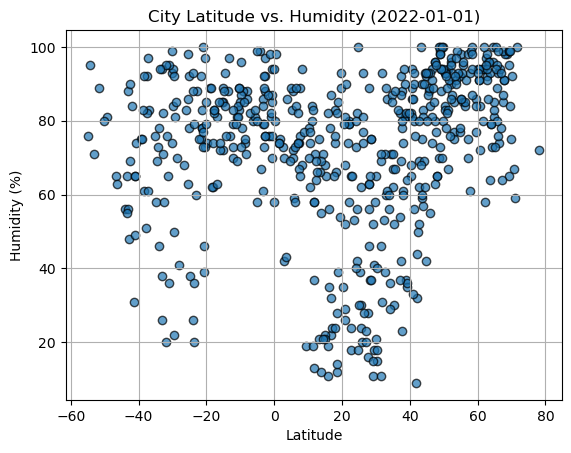

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-01-01)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#save fig
plt.savefig("C:/Users/miame/OneDrive/Documents/bootcamp/MODULE 6 challenge/python-api-challenge/Starter_Code/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

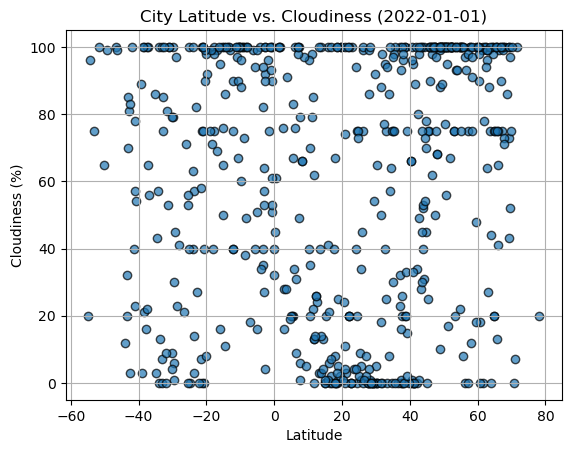

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-01-01)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#save fig
plt.savefig("C:/Users/miame/OneDrive/Documents/bootcamp/MODULE 6 challenge/python-api-challenge/Starter_Code/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

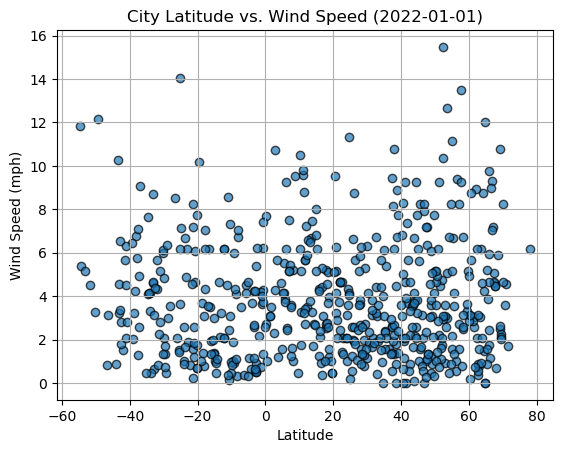

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-01-01)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/miame/OneDrive/Documents/bootcamp/MODULE 6 challenge/python-api-challenge/Starter_Code/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,chernyshevskiy,63.0128,112.4714,-27.53,96,99,0.79,RU,1707456655
3,ilulissat,69.2167,-51.1000,-17.99,65,73,10.80,GL,1707456655
4,weno,7.4515,151.8468,28.97,74,100,3.60,FM,1707456655
5,vorgashor,67.5833,63.9500,-7.38,85,100,5.06,RU,1707456655
6,niafunke,15.9322,-3.9906,19.49,11,100,4.31,ML,1707456655


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,24.92,92,100,14.03,PN,1707456655
2,port-aux-francais,-49.3500,70.2167,5.80,81,99,12.14,TF,1707456655
7,waitangi,-43.9535,-176.5597,16.01,56,12,0.89,NZ,1707456655
10,edinburgh of the seven seas,-37.0676,-12.3116,18.94,83,56,9.09,SH,1707456656
14,puerto ayora,-0.7393,-90.3518,25.86,94,51,1.34,EC,1707456656


In [52]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue}")
    print(f"The linear regression equation is: {line_eq}")
    plt.show()
 

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8935463487691874
The linear regression equation is: y = -0.73x + 34.13


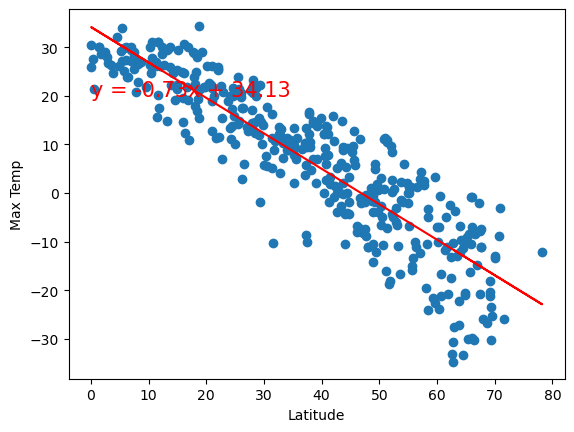

In [53]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"], "Max Temp", (0,20))

The r-value is: 0.5902268271537326
The linear regression equation is: y = 0.23x + 28.62


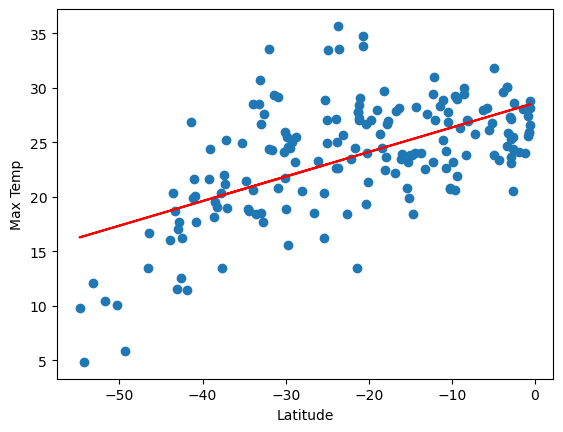

In [54]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"], "Max Temp", (-50, 90))

**Discussion about the linear relationship:** 
The regression model for the northern hemisphere data suggests a strong, negative (line of best fit decreasing with negative slope) relationship between max temp and latitude. generally, on avergae, as temp decreases, latitude is increasing.
The regression model for the southern hemisphere data suggests a strong, positive (line of best fit increasing with positive slope) relationship between max temp and latitude. generally, on avergae, as temp increases, latitude is increasing. However, this change in (slope) is more subtle than that of the northern hemisphere data.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.45019160350673026
The linear regression equation is: y = 0.55x + 50.36


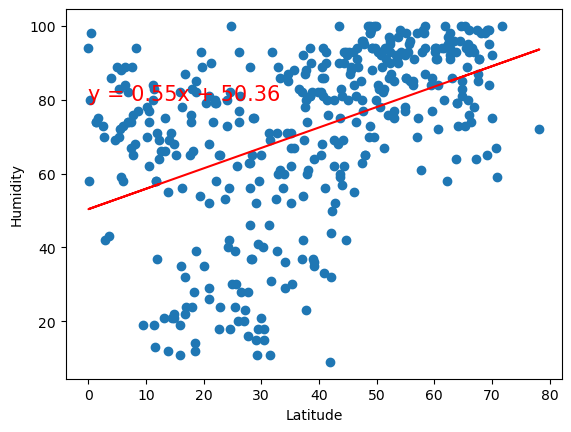

In [55]:
# Northern Hemisphere
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"], "Humidity", (0,80))

The r-value is: 0.07369399836043199


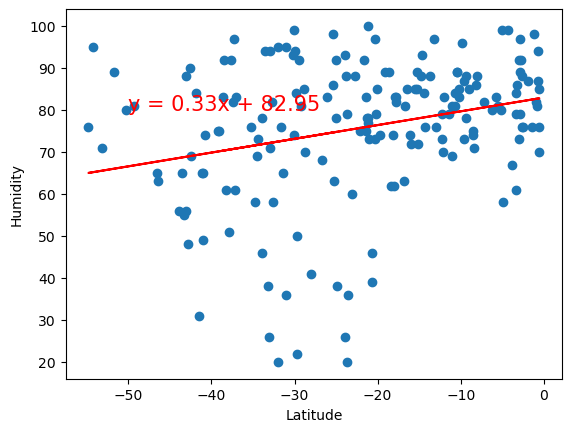

In [40]:
# Southern Hemisphere
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"], "Humidity", (-50,80))

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1287463878222125


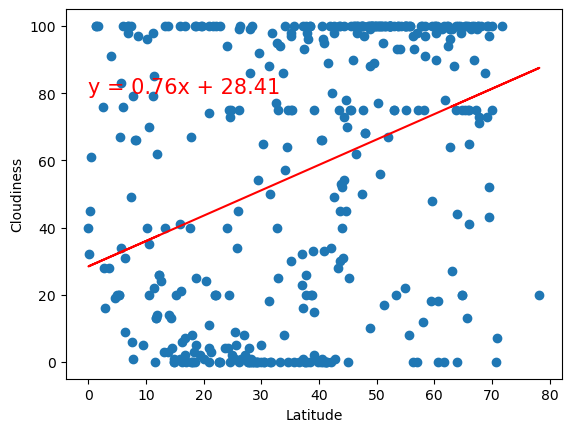

In [42]:
# Northern Hemisphere
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"], "Cloudiness", (0,80))

The r-value is: 0.03816664514116799


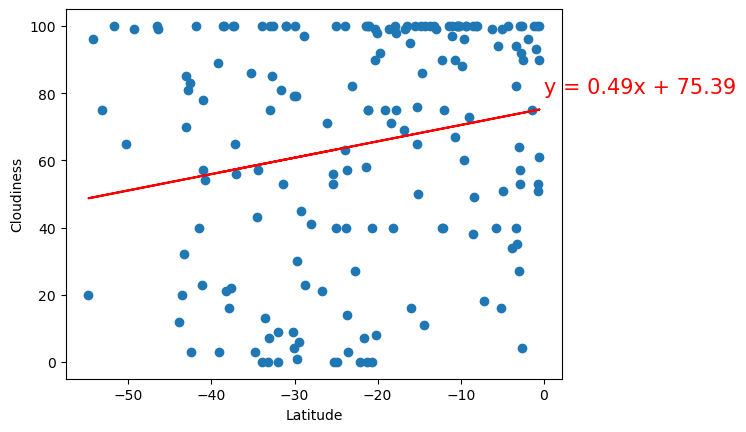

In [43]:
# Southern Hemisphere
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"], "Cloudiness", (0,80))

**Discussion about the linear relationship:** 
Both hemispheres demonstrate a positive correlation between cloudiness and latitude. According to the r-values, the nortern hemisphere data demonstrates a strong positive correlation whereas the southern hemisphere data demonstrates a moderate positive correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0050709171352227005
The linear regression equation is: y = 0.0x + 3.8


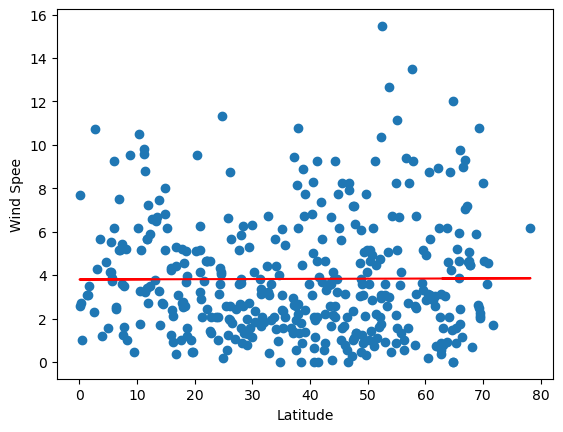

In [56]:
# Northern Hemisphere
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"], "Wind Spee", (0,80))

The r-value is: -0.2441797847478822
The linear regression equation is: y = -0.05x + 2.56


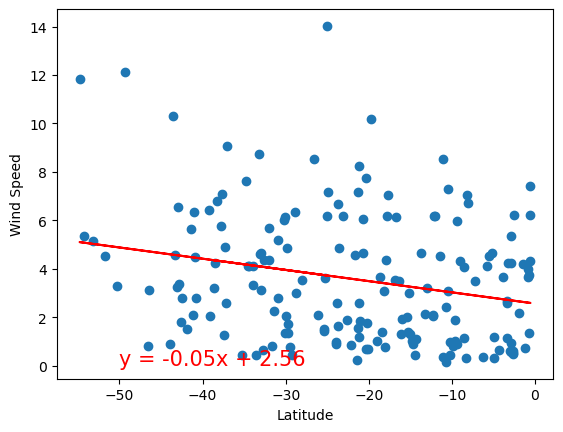

In [57]:
# Southern Hemisphere
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"], "Wind Speed", (-50,0))

**Discussion about the linear relationship:** 
the northern hemisphere plot suggests no correlation between wind speed and latitude with a slope =~ 1 and a low r value if not a zero r value.
the southern hemisphere plot suggests a moderately strong negative correlation between wind speed and latitude